# Exercício 1

A loja "GT Auto" decidiu aprimorar os treinamentos de vendedores inexperientes de carros, criando uma base de dados dos carros disponíveis que apresente algumas informações importantes para treinar os novos vendedores. 
A base de dados foi criada em um documento de texto e contem as seguintes informações:

*   Marca/Modelo/Ano do carro: brand/model/year
*   Capacidade volumétrica (cc) ou volume de deslocamento do motor: cap_vol.
*   Consumo de combustível (km/l): consumo.
*   Potência (cv): power.
*   Peso (kg): weight.
*   0-100 (s), tempo que o carro demora para atingir 100 m: cemm. 

Analise os dados dos 15 carros com motor aspirado que a "GT Auto" tem em estoque para venda, e crie alguns gráficos que simplifiquem as informações úteis para ajudar os novos vendedores a entender melhor as características dos carros. Seguen algumas sugestões:

a. Realizar um diagrama de ramo e folha para observar as variáveis.

b. Realize um diagrama de dispersão para verificar a correlação entre a capacidade volumétrica e o consumo de combustível.

c. Realize um diagrama de dispersão para verificar a correlação entre a capacidade volumétrica e potência.

d. Realize um diagrama de dispersão para verificar a correlação entre o peso e o tempo 0-100.

Explique para a "GT Auto" como deve usar essas informações nos treinamentos.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import stemgraphic

file_path = 'cars_vertical1.txt'
data = pd.read_csv(file_path, delimiter='\t')  # Ajuste o delimitador conforme necessário

# Verificar se os dados foram importados
display(data.head())


,"brand/model/year,cap_vol,consumo,power,weight,cemm,nu_cy,Etype"
0,"Gurgel BR800 0.8 1991,792,12,33,650,34.4,2,0"
1,"FIAT UNO Mille EP 1996,994,10.4,58,870,18.6,4,0"
2,"Hyundai HB20 Sense 2020,1000,12.8,80,989,14.5,3,0"
3,"FIAT Strada 1.4 2016,1368,10.3,86,1084,12.5,4,0"
4,"VolksWagen GOL 1.6 2015,1598,10.5,104,961,9.8,4,0"


In [6]:
df = pd.read_csv(file_path)
df.head(15)

,brand/model/year,cap_vol,consumo,power,weight,cemm,nu_cy,Etype
0,Gurgel BR800 0.8 1991,792,12.0,33,650,34.4,2,0
1,FIAT UNO Mille EP 1996,994,10.4,58,870,18.6,4,0
2,Hyundai HB20 Sense 2020,1000,12.8,80,989,14.5,3,0
3,FIAT Strada 1.4 2016,1368,10.3,86,1084,12.5,4,0
4,VolksWagen GOL 1.6 2015,1598,10.5,104,961,9.8,4,0
5,Chevrolet Cruze LTZ 1.8 2016,1796,8.5,144,1427,10.2,4,0
6,Honda Civic EXR 2016,1997,9.5,155,1294,10.9,4,0
7,Ford Focus 2.0 GLX 2012,1999,9.2,148,1347,10.4,4,0
8,BMW 325i 3.0 2012,2996,6.5,218,1460,7.1,6,0
9,AUDI A4 3.2 V6 Fsi 2011,3197,7.1,269,1610,6.4,6,0


In [7]:
#Exibindo informações sobre o conjunto de dados
df.info()
# Computa estatísticas de atributos numéricos
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand/model/year  14 non-null     object 
 1   cap_vol           14 non-null     int64  
 2   consumo           14 non-null     float64
 3   power             14 non-null     int64  
 4   weight            14 non-null     int64  
 5   cemm              14 non-null     float64
 6   nu_cy             14 non-null     int64  
 7   Etype             14 non-null     int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.0+ KB


,cap_vol,consumo,power,weight,cemm,nu_cy,Etype
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.0
mean,2867.785714,8.357143,218.000000,1294.714286,11.007143,5.357143,0.0
std,2066.127935,2.848944,168.564984,348.445654,7.917893,2.590133,0.0
min,792.000000,3.000000,33.000000,650.000000,3.600000,2.000000,0.0
25%,1425.500000,6.525000,90.500000,1012.750000,6.175000,4.000000,0.0
50%,1998.000000,8.850000,151.500000,1320.500000,10.000000,4.000000,0.0
75%,3422.750000,10.375000,296.750000,1572.500000,12.100000,6.000000,0.0
max,7291.000000,12.800000,602.000000,1760.000000,34.400000,12.000000,0.0


(<Figure size 750x175 with 1 Axes>, <Axes: >)

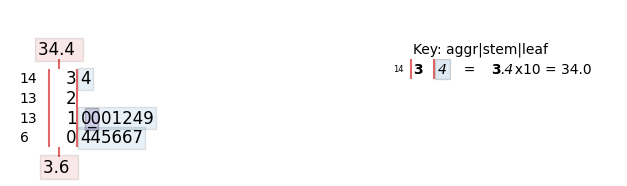

In [9]:
### Resposta a)
# Realizar um diagrama de ramo e folha para observar as variáveis.

#@title tratamento de dados 
c1=df["cap_vol"]
c2=df["consumo"]
c3=df["power"]
c4=df["weight"]
c5=df["cemm"]

# Observar todas as variáveis e escolher as adequadas
# c1, scale=1000 --> Capacidade volumétrica ou cilindrada
# c2, scale=1    --> Consumo	
# c3, scale=100  --> Potência
# c4, scale=100  --> Peso
# c5, scale=10   --> 0-100
stemgraphic.stem_graphic(c5, scale = 10)

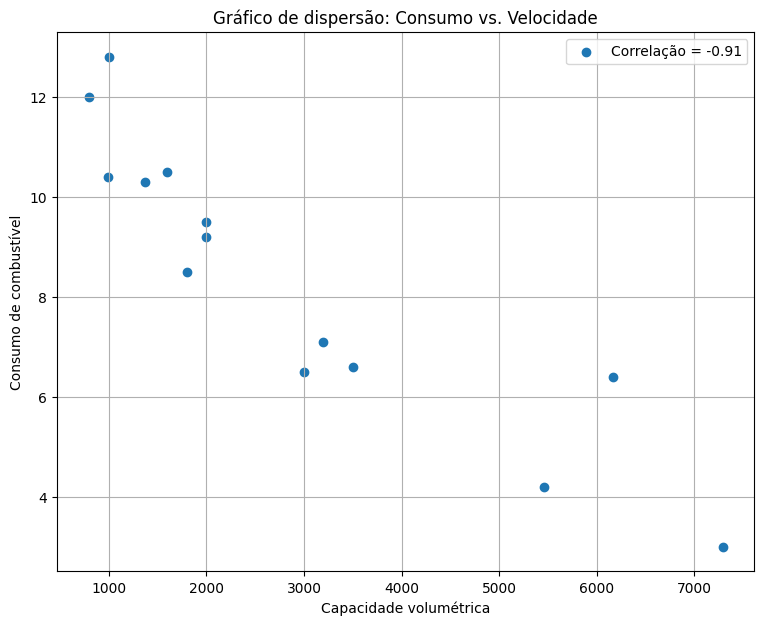

In [11]:
### Resposta b)
# Realize um diagrama de dispersão para verificar a correlação entre a capacidade volumétrica e o consumo de combustível.

 #Consumo vs. Velocidade --> c1,c2
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':100})
plt.scatter(c1, c2, label=f'Correlação = {np.round(np.corrcoef(c1,c2)[0,1], 2)}')
plt.xlabel('Capacidade volumétrica')
plt.ylabel('Consumo de combustível') 
plt.title('Gráfico de dispersão: Consumo vs. Velocidade')
plt.legend()
plt.grid(True)
plt.show()


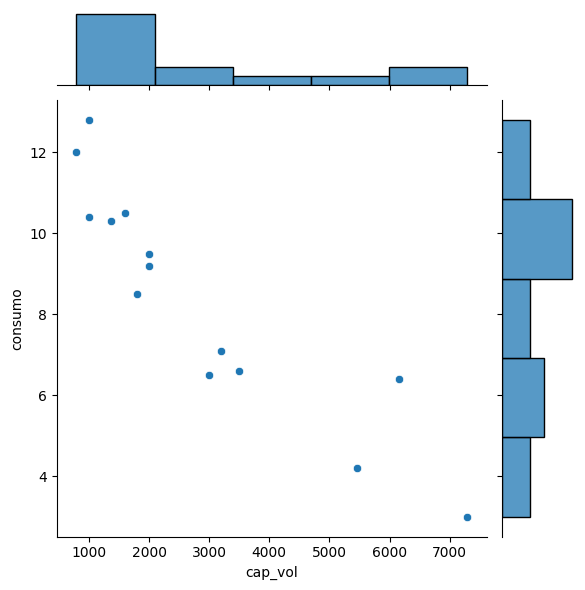

In [12]:
sns.jointplot(x=c1,y=c2);

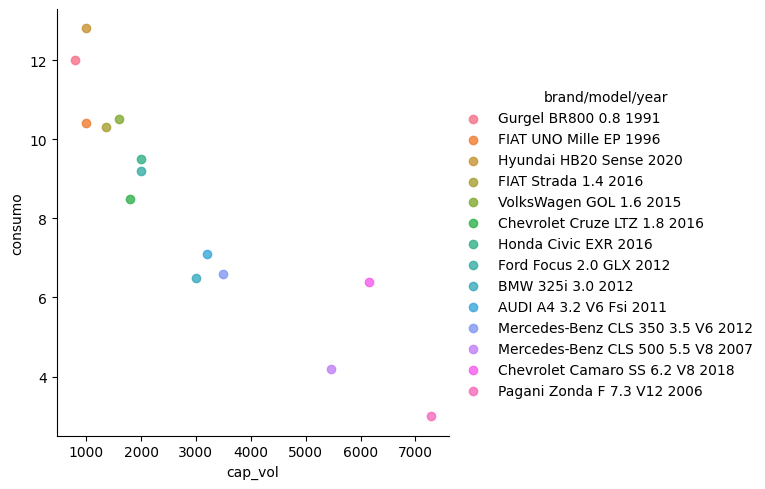

In [13]:
df1 = pd.DataFrame(data=df)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.lmplot(x='cap_vol', y='consumo',hue='brand/model/year', data=df1);

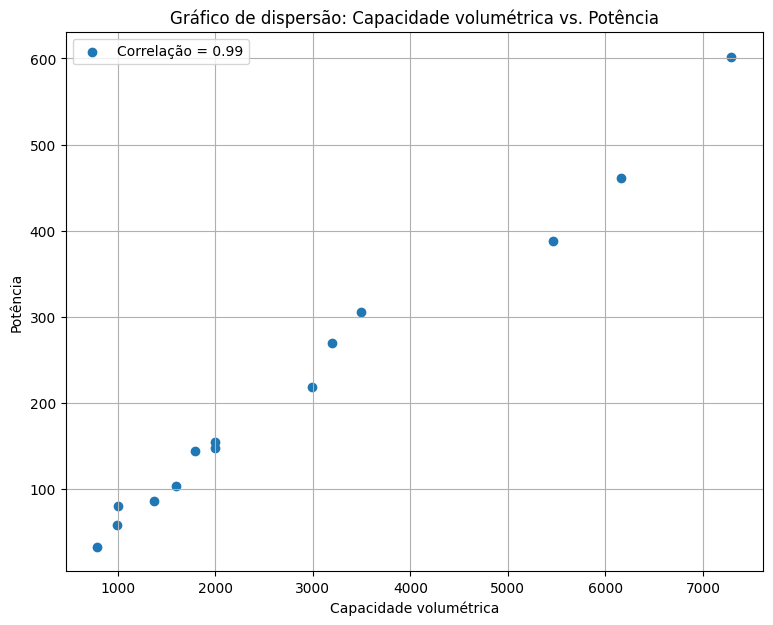

In [14]:
### Resposta c)
# Realize um diagrama de dispersão para verificar a correlação entre a capacidade volumétrica e potência.

# Capacidade volumétrica vs. Potência --> c1,c3
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':100})
plt.scatter(c1,c3, label=f'Correlação = {np.round(np.corrcoef(c1,c3)[0,1], 2)}')
plt.xlabel('Capacidade volumétrica')
plt.ylabel('Potência') 
plt.title('Gráfico de dispersão: Capacidade volumétrica vs. Potência')
plt.legend()
plt.grid(True)
plt.show()

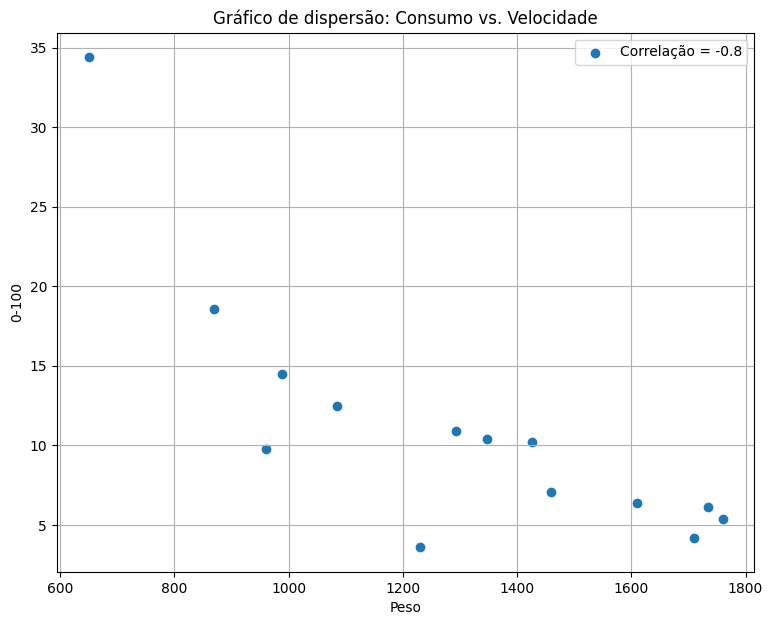

In [15]:
### Resposta d)
# Realize um diagrama de dispersão para verificar a correlação entre o peso e o tempo 0-100.

 #Consumo vs. Velocidade --> c4,c5,
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':100})
plt.scatter(c4,c5, label=f'Correlação = {np.round(np.corrcoef(c4,c5)[0,1], 2)}')
plt.xlabel('Peso')
plt.ylabel('0-100') 
plt.title('Gráfico de dispersão: Consumo vs. Velocidade')
plt.legend()
plt.grid(True)
plt.show()

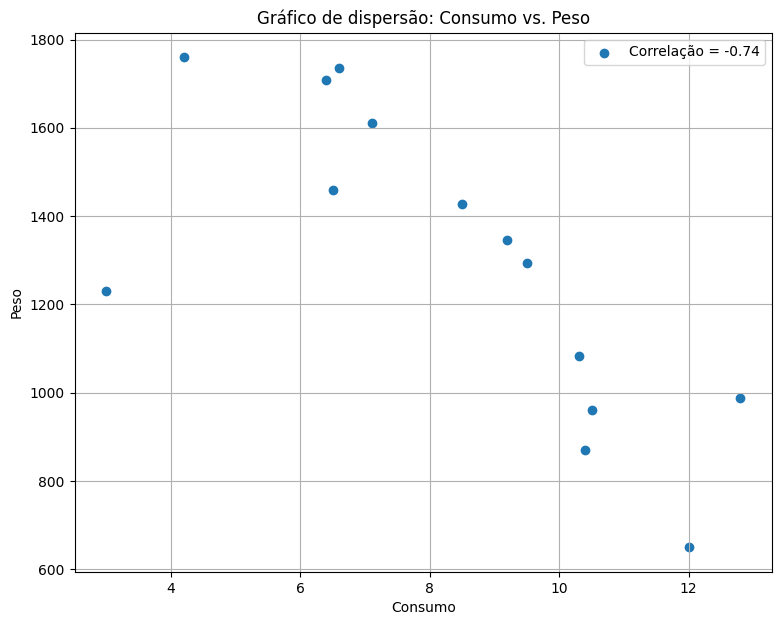

In [16]:
#@title Observações 1
#Outros dados: Consumo vs. Peso--> c2,c4,
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':100})
plt.scatter(c2,c4, label=f'Correlação = {np.round(np.corrcoef(c2,c4)[0,1], 2)}')
plt.xlabel('Consumo')
plt.ylabel('Peso') 
plt.title('Gráfico de dispersão: Consumo vs. Peso')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# Definir um data frame ao invés de tratar as variáveis uma a uma
df2 = pd.read_csv('cars_vertical2.txt')
df2 = pd.DataFrame(data=df2)
df2

,brand/model/year,cap_vol,consumo,power,weight,cemm,classi
0,Gurgel BR800 0.8 1991,792,12.0,33,650,34.4,0
1,FIAT UNO Mille EP 1996,994,10.4,58,870,18.6,0
2,Hyundai HB20 Sense 2020,1000,12.8,80,989,14.5,0
3,FIAT Strada 1.4 2016,1368,10.3,86,1084,12.5,0
4,VolksWagen GOL 1.6 2015,1598,10.5,104,961,9.8,1
5,Chevrolet Cruze LTZ 1.8 2016,1796,8.5,144,1427,10.2,1
6,Honda Civic EXR 2016,1997,9.5,155,1294,10.9,1
7,Ford Focus 2.0 GLX 2012,1999,9.2,148,1347,10.4,1
8,BMW 325i 3.0 2012,2996,6.5,218,1460,7.1,1
9,AUDI A4 3.2 V6 Fsi 2011,3197,7.1,269,1610,6.4,1


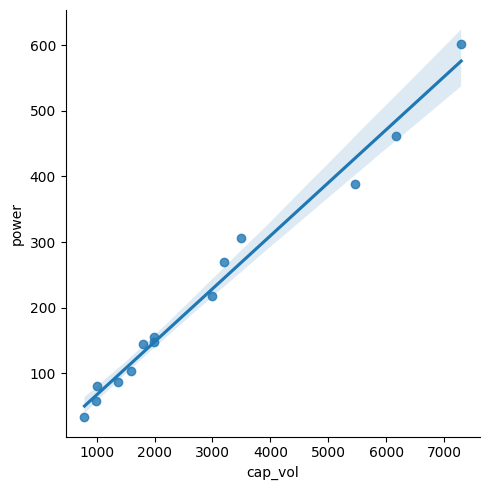

In [19]:
#@title Observações 3 
#OBservar dados ao redor da reta, análise previa correlação = 0,91
sns.lmplot(x='cap_vol', y='power', data=df2);

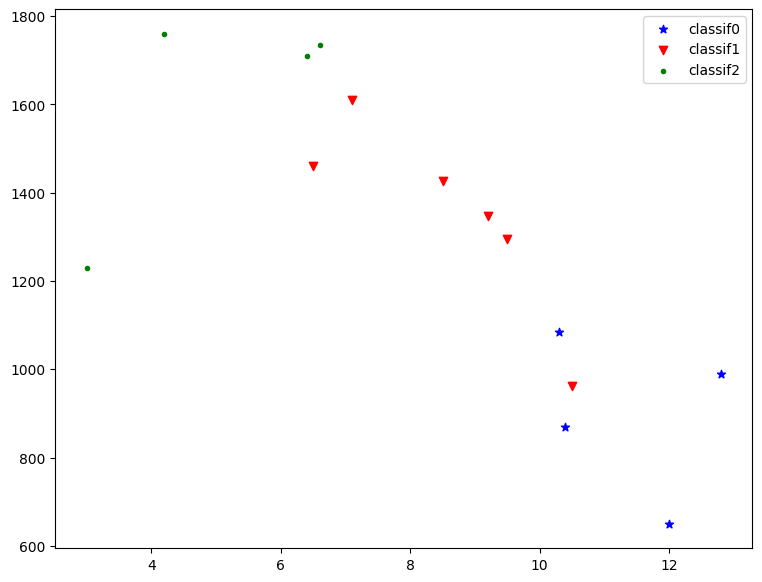

In [20]:
#@title Observações 4
dfa=df[df2['classi']==0]
dfb=df[df2['classi']==1]
dfc=df[df2['classi']==2]
# Plot 
# dfa['var_x'],dfa['var_y']
plt.scatter(dfa['consumo'],dfa['weight'],color='blue', marker= '*', label='classif0')
plt.scatter(dfb['consumo'],dfb['weight'],color= 'red', marker='v', label='classif1')
plt.scatter(dfc['consumo'],dfc['weight'],color= 'green', marker='.', label='classif2')
plt.legend()

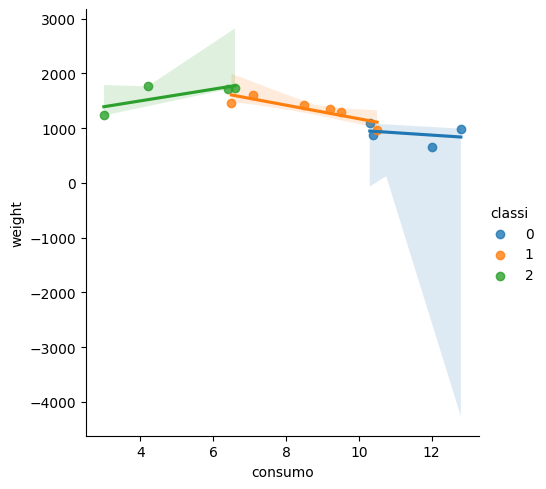

In [21]:
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.lmplot(x='consumo', y='weight', hue='classi', data=df2);